    # Effects of different preprocessing techniques on cataract dataset

#### Bekir Semih Tekeli
#### Ayşe Şule Bakal

In this project we experiment with and analyze the effects of various preprocessing methods on our Convolutional Neural Network model trained for diagnosing and detecting eye defects.


## Table of Content

[Problem](#problem)   
[Data Understanding](#data_understanding)   
[Data Preparation](#data_preparation)   
[Modeling](#modeling)   
[Evaluation](#evaluation)   
[References](#references)   


## Problem <a class="anchor" id="problem"></a>

Machine learning in healthcare can provide apt and robust solutions to many problems we can face. In order to provide treatment to an ailment it's important to first correctly recognize the issue. Additionally when it comes to health time is always of the essence. Quick and correct diagnosis could greatlly differ the outcome of a medical procedure. We aim to tackle and aid in the process of detection and diagnosis of eye diseases in particular. As it is already a populer field with various experiments, we intend to add to the cumulative information with different methods and share our findings.


## Data Understanding<a class="anchor" id="data_understanding"></a>

<h1><span class="label label-primary">Eye Diseases:</span></h1>
<div class="card text-white bg-info mb-3" style="max-width: 60rem;">
  <div class="card-body">

There are many eye diseases. Every anatomical part of this organ can present a disorder and cause an eye disorder. It is important for the patient to fully understand the nature of his ocular disorder in order to take good care of his visual condition. It also makes it possible to better manage a disease and detect signs indicating deterioration. An informed and savvy patient is more likely to be treated on time, to feel confident and to adhere to their treatment..
  </div>
</div>

<div class="card text-white bg-primary" style="max-width: 60rem;">
  <div class="card-body">
    <p class="card-text">
In this dataset, annotations were added by human readers trained in quality control management. They classify patients into four categories, including:

</p>
  </div>

 <ul style="list-style-type:circle;">
  <li>Normal       (N)</li>
  <li>Cataract     (C)</li>
  <li>Glaucoma     (G)</li>
  <li>Diabetes     (D)</li>
</ul>
</div>


# Retina

The retina is a delicate, multilayered light-sensitive membrane lining the inside wall at the back of the eye. It is connected by the optic nerve to the brain. The macula, at the center of the retina, creates our ability to see detail. The central pit in the macula that produces the sharpest vision is the fovea. Surrounding the macula is the peripheral retina, which enables our peripheral vision. Attached to the retina, the vitreous is a gel-like substance that fills the eyeball between the lens and the retina.


# Normal (N)

![](https://www.rcseattle.com/wp-content/uploads/2016/05/resources-normal-1.png)

# Cataract (C)
A cataract is a clouding of the natural lens of the eye, called the lens. The latter is located inside the eye, behind the iris, which represents the colored part forming the pupil. The diagram of the anatomy of the eye shows it well. Several factors, including age, heredity, medication and environment, contribute to the formation of cataracts. Over time, the lens becomes frosty, yellowish and hazy. The light passing through this lens is therefore altered and diminished by the cataract. Cataract extraction is an intraocular surgical procedure that can permanently treat this condition.

![](https://www.nvisioncenters.com/wp-content/uploads/cataract-eye-vs-normal-eye-960x639.jpg)

# Glaucoma (G)
Glaucoma is an eye disease that irreversibly and permanently affects the optic nerve (structural damage). The optic nerve is the part of the eye through which passes all the visual information captured by the eye. This information travels through the optic nerve and is transmitted to the brain.

Glaucoma is a very common disease that affects people of all ages. According to sources, it is estimated that up to 10% of the population would be affected. Globally, this represents 65 million people.

![](https://www.wolfeeyeclinic.com/filesimages/Glaucoma/GlaucomaEyeDiagram-min.jpg)

# Diabetes (D)
Diabetes is a very serious disease that can cause problems like blindness, heart disease, kidney failure and amputations. By taking good care of your health through healthy eating, regular exercise and taking your medications, you can control diabetes. Diabetes can also affect the eye, this is called diabetic retinopathy.

All people with diabetes should have an eye exam using a photo-screening device or an eye exam with pupil dilation annually. As soon as the disease (diabetic retinopathy) is visible in the eye, an examination with pupil dilation should be performed for follow-up at variable frequency.

In some people with diabetic retinopathy, the blood vessels in the retina may swell and leak, while in others, new abnormal blood vessels may form on the surface of the retina. These changes can lead to vision loss or even blindness.

![](https://myvision.org/wp-content/uploads/2022/02/diabetic-retinopathy-diagram-664x321.jpg)


## Data Preparation<a class="anchor" id="data_preparation"></a>

In [1]:
import warnings

warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from keras.layers import *
from keras.models import Sequential
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
import numpy as np
import tensorflow as tf

tf.get_logger().setLevel(3)
import cv2
import os, glob
import pandas as pd

2022-12-31 01:55:11.420328: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-31 01:55:12.067711: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-31 01:55:12.067771: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-31 01:55:12.067778: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [2]:
DATASET_PATH = r"./dataset/"
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
EPOCHS = 30
BATCH_SIZE = 32
SEED = 42
dataset_folders = []  # to keep main folder names
total = 0
print(f"There are {len(os.listdir(DATASET_PATH))} folder in dataset.")
for path in sorted(os.listdir(DATASET_PATH)):
    print(f"\t-There are {len(os.listdir(DATASET_PATH + path))} images in {path} folder.")
    total += len(os.listdir(DATASET_PATH + path))  # add element size of the current folder to total variable
    dataset_folders.append(DATASET_PATH + path)  # add current folder path to dataset_folders

# Create an empty dataframe
df = pd.DataFrame(0,
                  columns=['paths',
                           'class_label'],
                  index=range(total))
# store each image path in the dataframe
# class labels -> 0:Normal 1:Cataract 2:Glaucoma 3:RetinaDisease
i = 0
for p, path in enumerate(dataset_folders):  # main folders
    for sub_path in sorted(os.listdir(path)):  #images
        df.iloc[i, 0] = path + "/" + sub_path
        df.iloc[i, 1] = p
        i += 1
# Display some examples for the created DataFrame
print(df.sample(frac=1, random_state=SEED).head(10))
train_df, test_df = train_test_split(df,
                                     test_size=0.2,
                                     random_state=SEED,
                                     stratify=df['class_label'])

There are 4 folder in dataset.
	-There are 300 images in 1_normal folder.
	-There are 100 images in 2_cataract folder.
	-There are 101 images in 2_glaucoma folder.
	-There are 100 images in 3_retina_disease folder.
                                         paths  class_label
110              ./dataset/1_normal/NL_111.png            0
419      ./dataset/2_glaucoma/Glaucoma_020.png            2
565  ./dataset/3_retina_disease/Retina_065.png            3
77               ./dataset/1_normal/NL_078.png            0
181              ./dataset/1_normal/NL_182.png            0
284              ./dataset/1_normal/NL_285.png            0
10               ./dataset/1_normal/NL_011.png            0
469      ./dataset/2_glaucoma/Glaucoma_070.png            2
78               ./dataset/1_normal/NL_079.png            0
349      ./dataset/2_cataract/cataract_050.png            1


In [3]:
example_paths = ["./dataset/1_normal/NL_001.png", "./dataset/2_cataract/cataract_001.png",
                 "./dataset/2_glaucoma/Glaucoma_001.png", "./dataset/3_retina_disease/Retina_001.png"]
images_array1 = []
images_array2 = []


def display_examples(images_array1, images_array2, row1, row2, channel=3):
    fig = plt.figure(figsize=(15, 9))
    plt.title(f"First row->{row1} Images    Second row->{row2} Images")
    plt.axis('off')
    plt.grid(False)
    for i in range(4):
        current_path = example_paths[i]

        fig.add_subplot(2, 4, i + 1)
        plt.axis('off')
        plt.title(current_path.split("/")[3])
        plt.imshow(images_array1[i])

        fig.add_subplot(2, 4, i + 5)
        plt.axis('off')
        plt.title(current_path.split("/")[3])
        if channel == 1:
            plt.imshow(images_array2[i], cmap='gray')
        else:
            plt.imshow(images_array2[i])

## Initial preprocess
Our first preprocessing method is applied in every iteration since the outcome is the stripping of unnecessary data.

In this preprocess, we delete unnecessary black areas from the images. Also we resize the images to 256x256 due to huge dimensions and to feed our model with a standard image shape.


In [4]:
#Cropping image to avoid from unnecessary black areas
def deleteBlackAreas(filename):
    image_size = (IMAGE_WIDTH, IMAGE_HEIGHT)
    img = cv2.imread(filename)  #read image from file
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # convert to grayscale
    _, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)  # turn it into a binary image
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  # find contours
    if len(contours) != 0:
        #find the biggest area
        cnt = max(contours, key=cv2.contourArea)

        #find the bounding rect
        x, y, w, h = cv2.boundingRect(cnt)

        crop = img[y:y + h, x:x + w]  # crop image
        crop1 = cv2.cvtColor(cv2.resize(crop, image_size, interpolation=cv2.INTER_AREA),
                             cv2.COLOR_BGR2RGB)  # resize to image_size and change color space from BGR to RGB for matplotlib
        return crop1
    else:
        return cv2.cvtColor(cv2.resize(img, image_size, interpolation=cv2.INTER_AREA), cv2.COLOR_BGR2RGB)

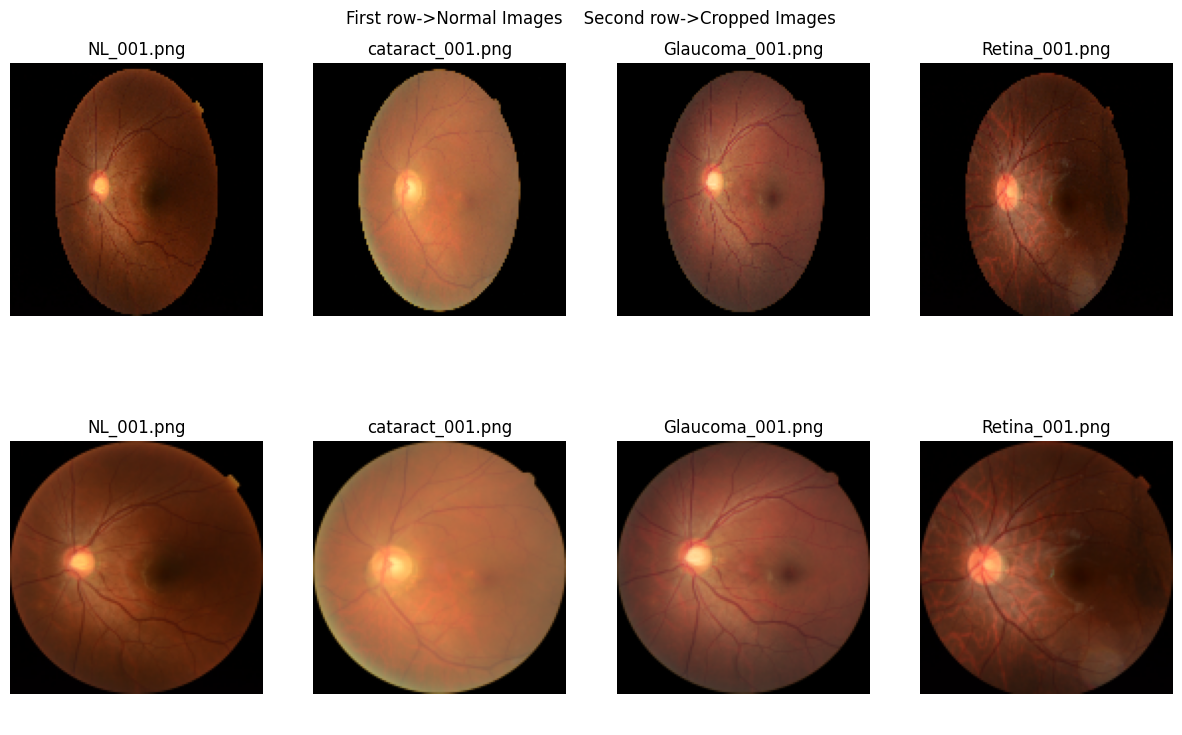

In [5]:
for i in range(4):
    img = cv2.resize(cv2.cvtColor(cv2.imread(example_paths[i]), cv2.COLOR_BGR2RGB), (IMAGE_WIDTH, IMAGE_HEIGHT))
    images_array1.append(img)
    img2 = deleteBlackAreas(example_paths[i])
    images_array2.append(img2)
display_examples(images_array1, images_array2, "Normal", "Cropped")
images_array1.clear()
images_array2.clear()

## 1.Normalization of histogram of images
Histogram equalization is a method in image processing of contrast adjustment using the image's histogram[1]. It is used the improve the global contrast of images and allows intensities to be better distributed and utilized. The method is used to obtain better views in greater detail of images with over or under exposure. In this preprocess, we normalize all three (R-G-B) channels.


In [6]:
#color_normalization of images
def color_normalization(img):
    image_copy = img.copy()
    for i in range(3):
        imi = img[:, :, i]
        minval = np.min(imi)
        maxval = np.max(imi)
        imrange = maxval - minval
        # imi-minval will turn the color range between 0-imrange, and the scaling will stretch the range between 0-255
        image_copy[:, :, i] = (255 / (imrange + 0.0001) * (imi - minval))
    return image_copy

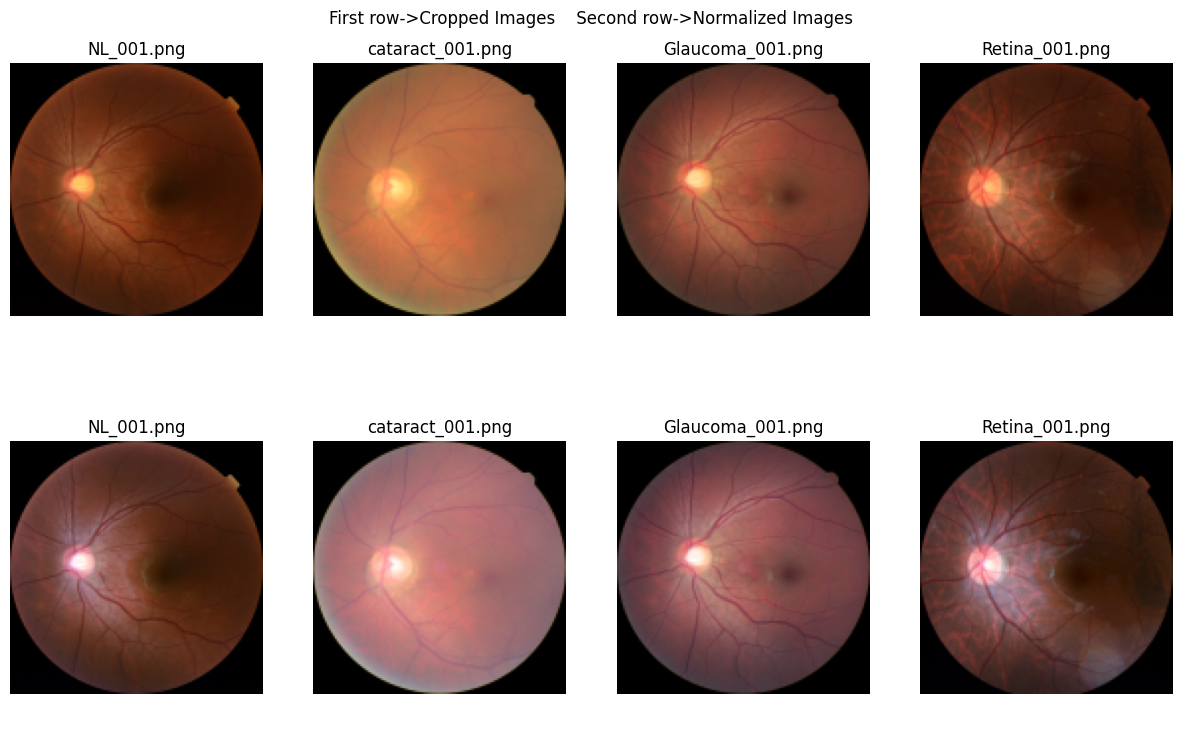

In [7]:
for i in range(4):
    img = deleteBlackAreas(example_paths[i])
    images_array1.append(img)
    img2 = color_normalization(img)
    images_array2.append(img2)
display_examples(images_array1, images_array2, "Cropped", "Normalized")
images_array1.clear()
images_array2.clear()

# 2.Canny Edge
Canny Edge Method is a technique that yields useful structural information by detecting edges in images. It also reduces the amount of data to be processed. We utilized the openCv library of Python to implement this method.


In [8]:
def canny_edge(img):
    t_lower = 20
    t_upper = 120
    edges = cv2.Canny(img, t_lower, t_upper, apertureSize=3, L2gradient=True)
    return edges

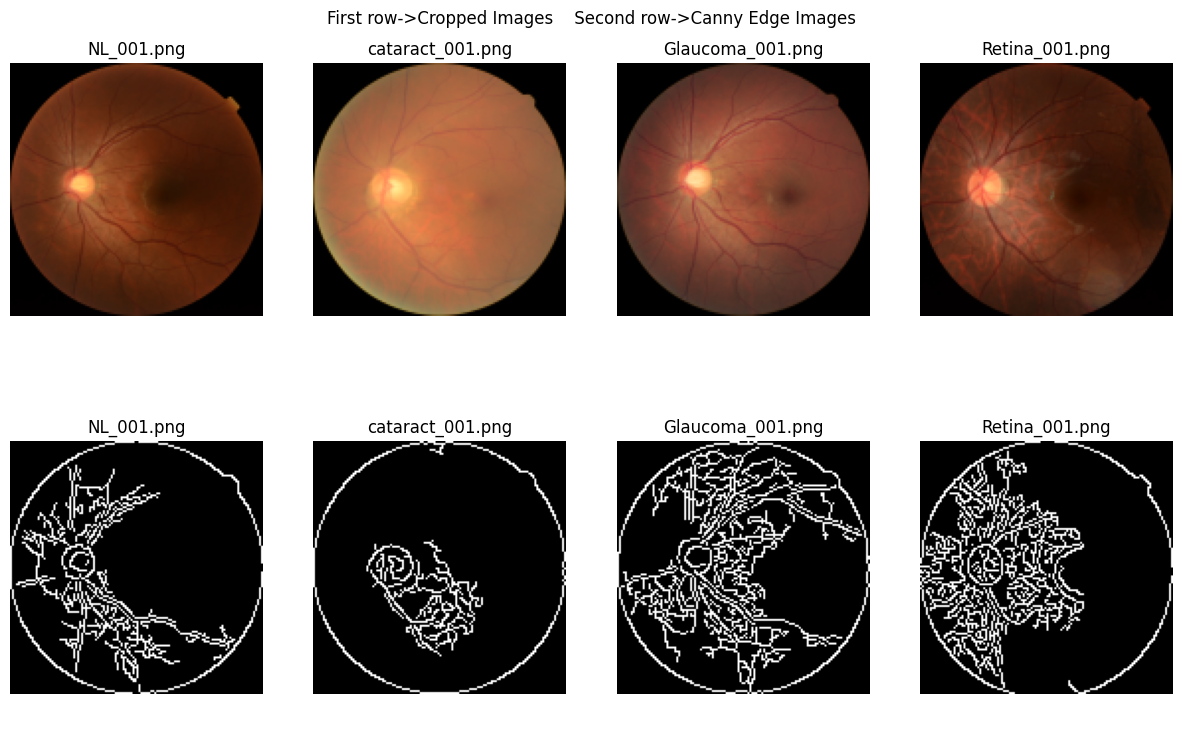

In [9]:
for i in range(4):
    img = deleteBlackAreas(example_paths[i])
    images_array1.append(img)
    img2 = canny_edge(img)
    images_array2.append(img2)
display_examples(images_array1, images_array2, "Cropped", "Canny Edge", 1)
images_array1.clear()
images_array2.clear()

# 3.GrayScaled
Grayscaling can help reduce noise and the amount of data to be processed by decreasing the color channels of images. It's a useful method that can be used when the images have strong constrast. We again deploy the openCV to implement this method.


In [10]:
def convertToGray(img):
    img_copy = img.copy()
    img_copy = cv2.cvtColor(img_copy, cv2.COLOR_RGB2GRAY)
    return img_copy

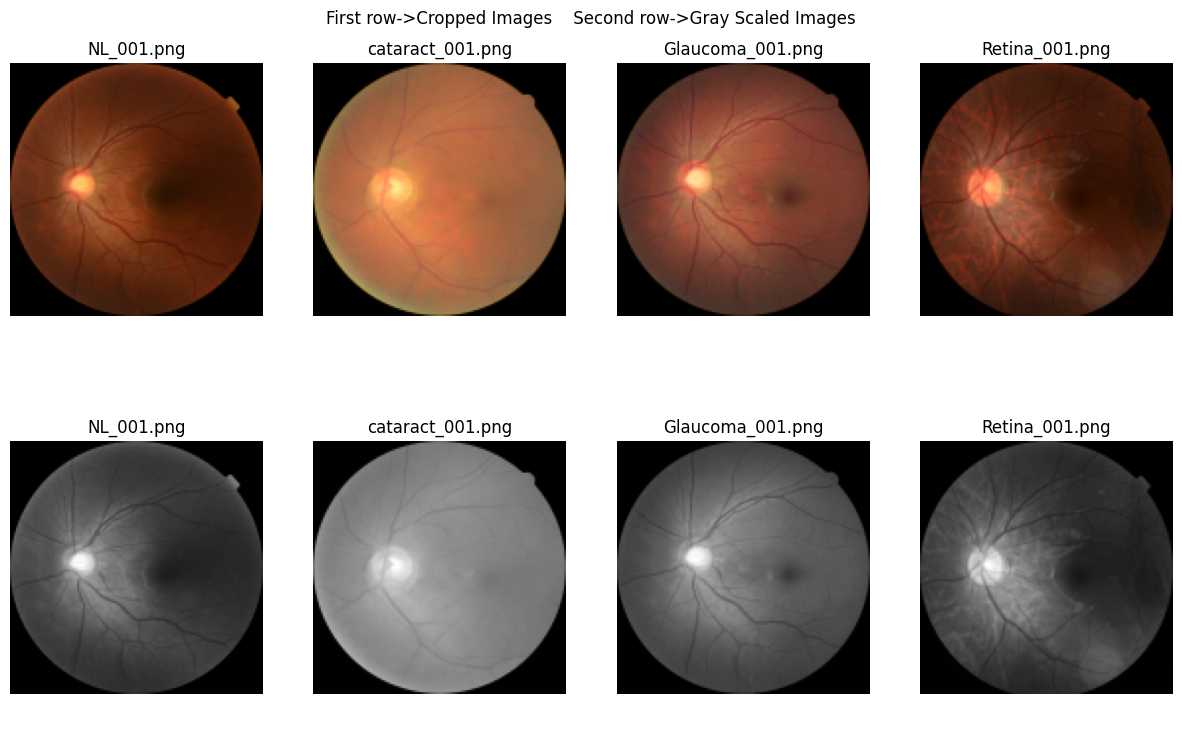

In [11]:
for i in range(4):
    img = deleteBlackAreas(example_paths[i])
    images_array1.append(img)
    img2 = convertToGray(img)
    images_array2.append(img2)
display_examples(images_array1, images_array2, "Cropped", "Gray Scaled", 1)
images_array1.clear()
images_array2.clear()

# 4. Histogram Equalization and Adaptive Histogram Equalization
Histogram Equalization is a computer image processing technique used to improve contrast in images. It accomplishes this by effectively spreading out the most frequent intensity values, i.e. stretching out the intensity range of the image. This method usually increases the global contrast of images when its usable data is represented by close contrast values. This allows for areas of lower local contrast to gain a higher contrast.
Adaptive Histogram Equalization differs from ordinary histogram equalization in the respect that the adaptive method computes several histograms, each corresponding to a distinct section of the image, and uses them to redistribute the lightness values of the image. It is therefore suitable for improving the local contrast and enhancing the definitions of edges in each region of an image.

In [12]:
def hist_equalization(img):
    array = np.asarray(img)
    bin_cont = np.bincount(array.flatten(), minlength=256)
    pixels = np.sum(bin_cont)
    bin_cont = bin_cont / pixels
    cumulative_sumhist = np.cumsum(bin_cont)
    map = np.floor(255 * cumulative_sumhist).astype(np.uint8)
    arr_list = list(array.flatten())
    eq_arr = [map[p] for p in arr_list]
    arr_back = np.reshape(np.asarray(eq_arr), array.shape)
    return arr_back


def ahe(img, rx=136, ry=185):
    img_eq = np.empty((img.shape[0], img.shape[1]), dtype=np.uint8)
    for i in range(0, img.shape[1], rx):
        for j in range(0, img.shape[0], ry):
            t = img[j:j + ry, i:i + rx]
            c = hist_equalization(t)
            img_eq[j:j + ry, i:i + rx] = c
    return img_eq

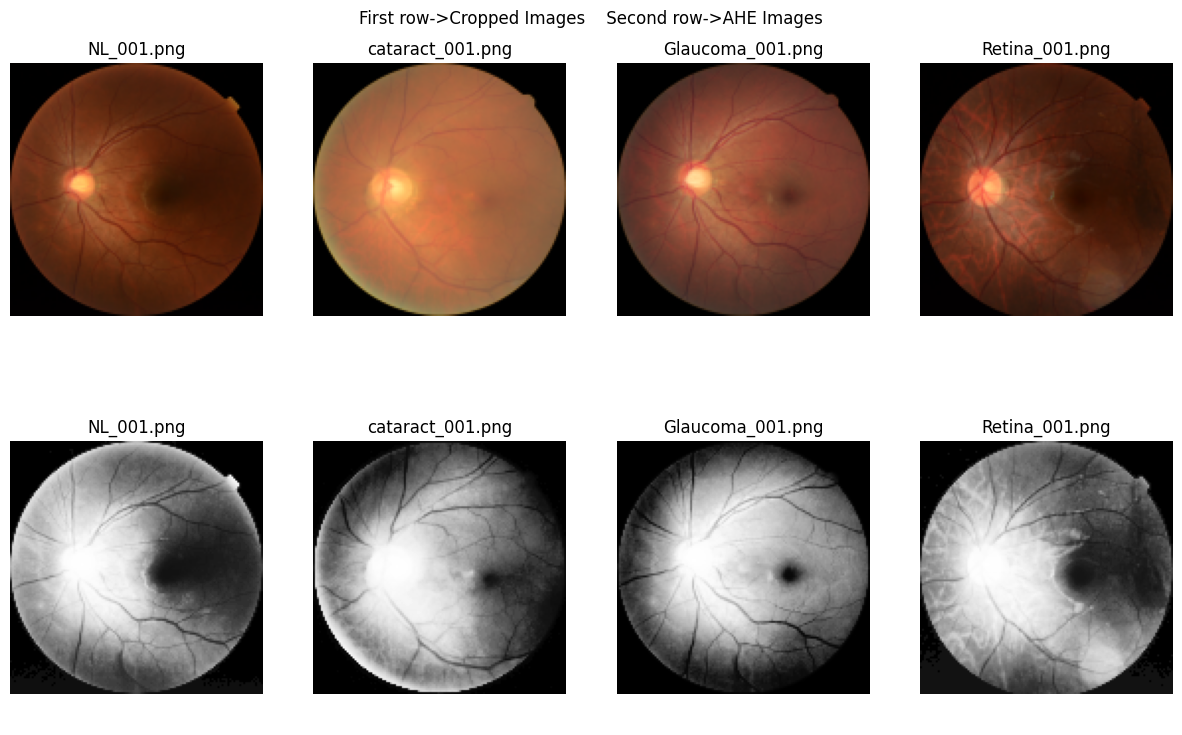

In [13]:
for i in range(4):
    img = deleteBlackAreas(example_paths[i])
    images_array1.append(img)
    img2 = ahe(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))
    images_array2.append(img2)
display_examples(images_array1, images_array2, "Cropped", "AHE", 1)
images_array1.clear()
images_array2.clear()

# 5. Color Space XYZ
A color space is a model which can be used to represent as many colors as our vision system can possibly perceive [2]. A different color space can help obtain new data that would be otherwise missed in another space. 


In [14]:
def convertColorSpace(img):
    img_copy = cv2.cvtColor(img, cv2.COLOR_RGB2XYZ)
    return img_copy

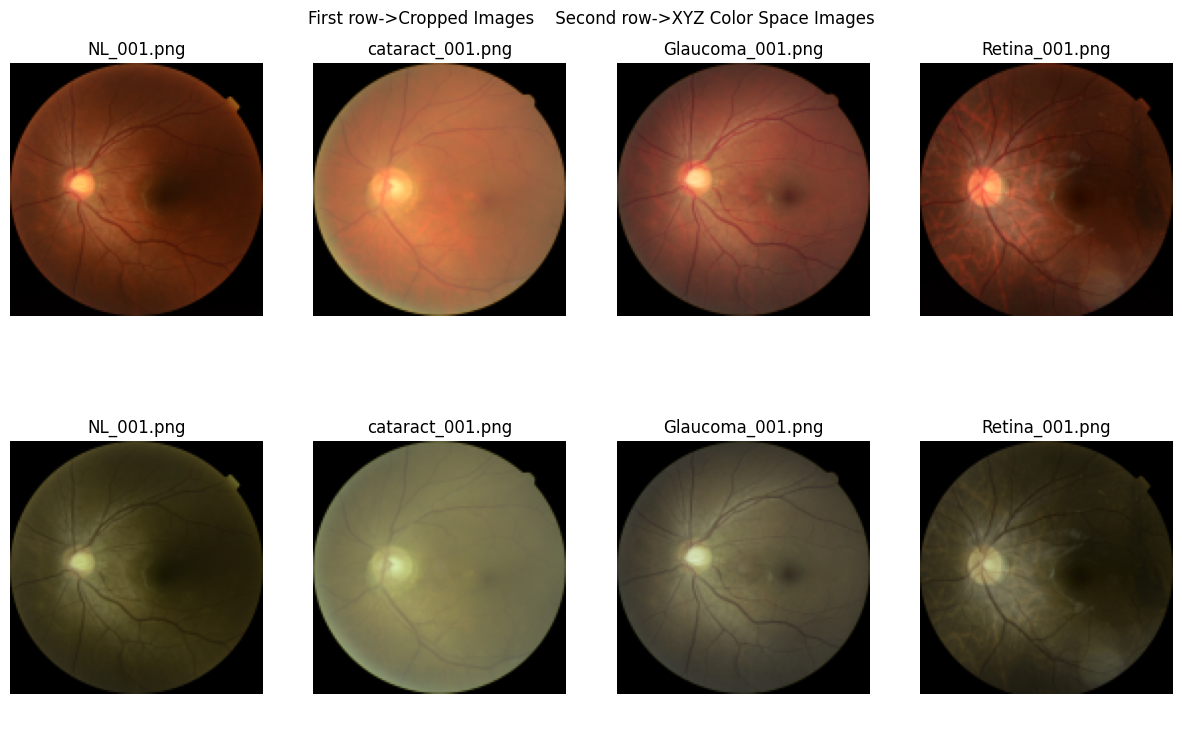

In [15]:
for i in range(4):
    img = deleteBlackAreas(example_paths[i])
    images_array1.append(img)
    img2 = convertColorSpace(img)
    images_array2.append(img2)
display_examples(images_array1, images_array2, "Cropped", "XYZ Color Space")
images_array1.clear()
images_array2.clear()

# 6. Binarization
Image binarization is the process of taking a grayscale image and converting it to black-and-white, essentially reducing the information contained within the image from 256 shades of gray to 2: black and white, a binary image [3]. Binarization can be used to obtain objects from an image and could provide useful when extracting features.

In [16]:
def binarization(img):
    img_copy = img.copy()
    img_copy = cv2.cvtColor(img_copy, cv2.COLOR_RGB2GRAY)
    img_copy = cv2.adaptiveThreshold(img_copy, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 3, 2)
    return img_copy

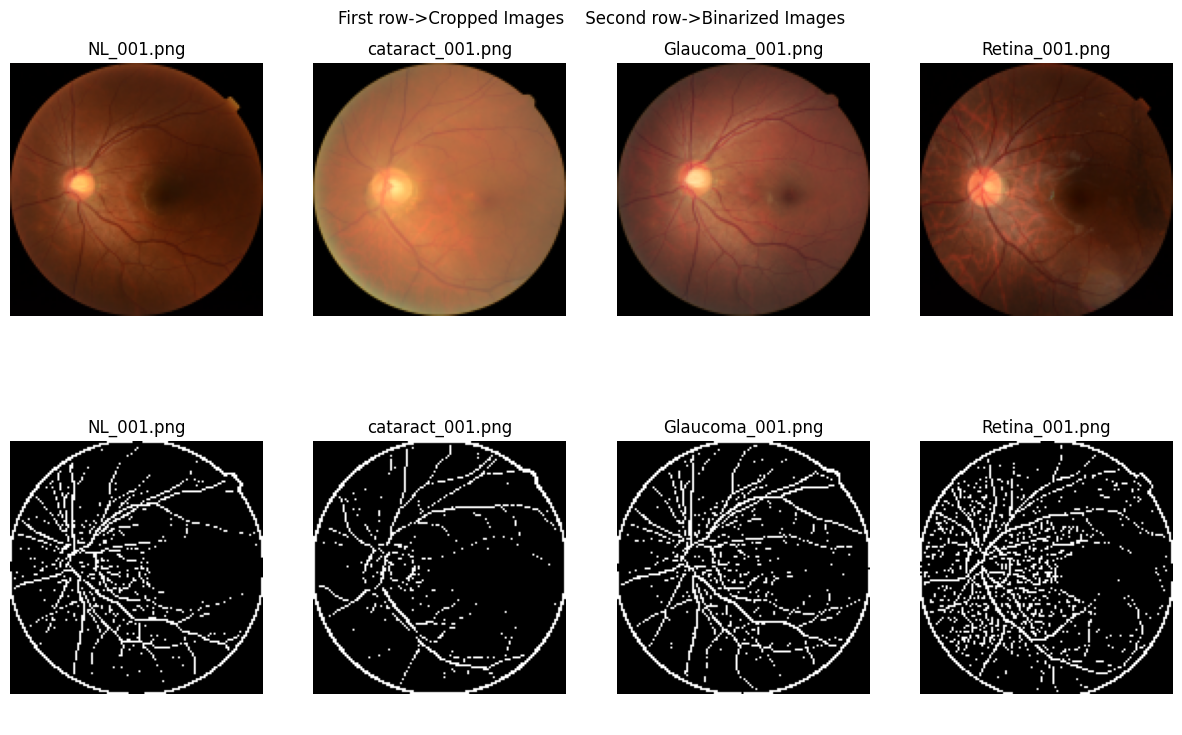

In [17]:
for i in range(4):
    img = deleteBlackAreas(example_paths[i])
    images_array1.append(img)
    img2 = binarization(img)
    images_array2.append(img2)
display_examples(images_array1, images_array2, "Cropped", "Binarized", 1)
images_array1.clear()
images_array2.clear()

In [18]:
def create_dataset(df):
    # Creating dataset
    images = []
    labels = []
    index = 0
    for path in tqdm(df['paths']):
        #According to parameter, we apply some preprocesses here. default=0
        img = deleteBlackAreas(path)  #deleting black areas. Initial preprocess
        label = [0, 0, 0, 0]
        label[df.iloc[index]["class_label"]] += 1
        index += 1
        images.append(img)
        labels.append(label)
        #Flipping the image horizontally and vertically
        imlr = cv2.flip(img, 0)
        imud = cv2.flip(img, 1)
        #add all the images and labels
        images.append(imlr)
        labels.append(label)
        images.append(imud)
        labels.append(label)
        if label[0] == 0:  # If the image is not in normal category
            # Below processes can be used to increase data size

            ## In these processes first we add little brightness to image. Then flip it horizontally and vertically
            imb = img + 0.4 * img  # brighter image
            imb[imb > 255] = 255
            images.append(imb)
            labels.append(label)

            imblr = cv2.flip(imb, 0)
            imbud = cv2.flip(imb, 1)
            images.append(imblr)
            labels.append(label)
            images.append(imbud)
            labels.append(label)

            ## In these processes first we add little dim to image. Then flip it horizontally and vertically
            imd = img - 0.4 * img  #deemer image
            imd[imd < 0] = 0
            images.append(imd)
            labels.append(label)

            imdlr = cv2.flip(imd, 0)
            imdud = cv2.flip(imd, 1)
            images.append(imdlr)
            labels.append(label)
            images.append(imdud)
            labels.append(label)
    images = np.array(images, dtype='float32')
    labels = np.array(labels)
    return images, labels


def changeMode(images, mode):
    ret_images = []
    for img in images:
        if mode == 1:
            img = color_normalization(img)
        elif mode == 2:
            img = np.array(img, dtype="uint8")
            img = canny_edge(img)
        elif mode == 3:
            img = convertToGray(img)
        elif mode == 4:
            img = np.array(img, dtype="uint8")
            img = ahe(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))
        elif mode == 5:
            img = convertColorSpace(img)
        elif mode == 6:
            img = np.array(img, dtype="uint8")
            img = binarization(img)
        ret_images.append(img)
    ret_images = np.array(ret_images, dtype='float32')
    return ret_images / 255


## Visualization of brightness outputs examples

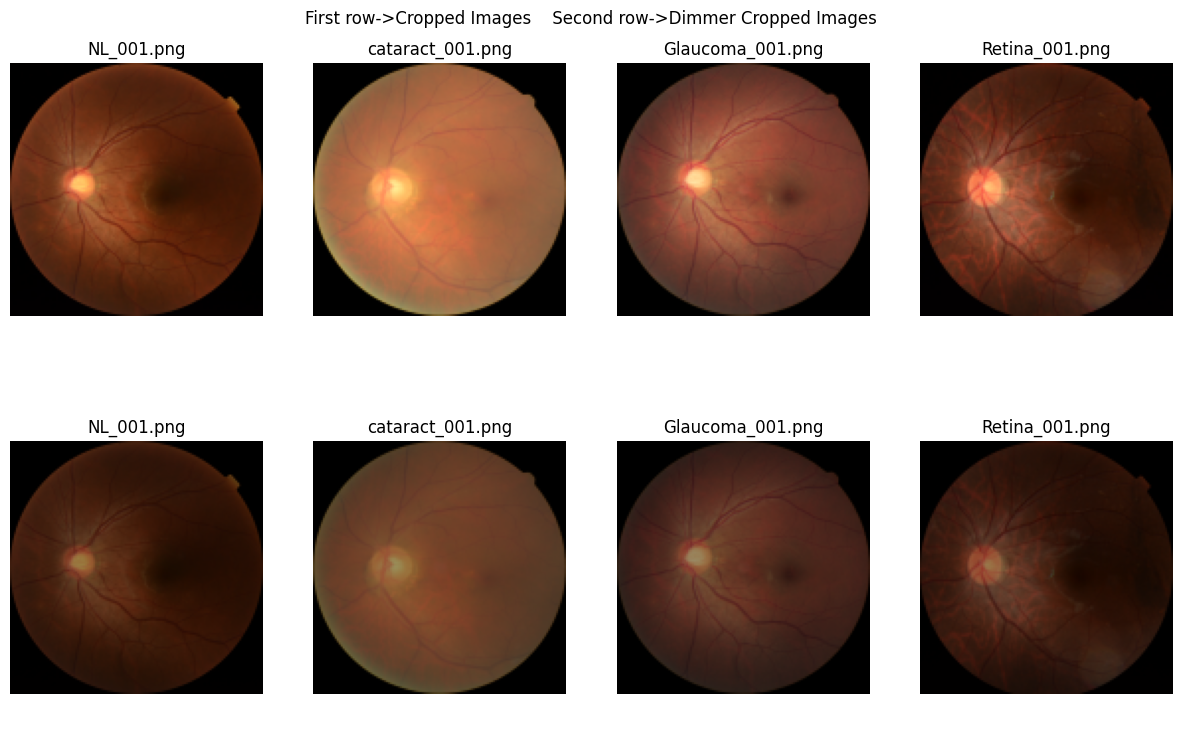

In [19]:
for i in range(4):
    img = deleteBlackAreas(example_paths[i])
    images_array1.append(img)
    img2 = img - 0.4 * img  #deemer image
    img2[img2 < 0] = 0
    images_array2.append(img2 / 255)
display_examples(images_array1, images_array2, "Cropped", "Dimmer Cropped")
images_array1.clear()
images_array2.clear()

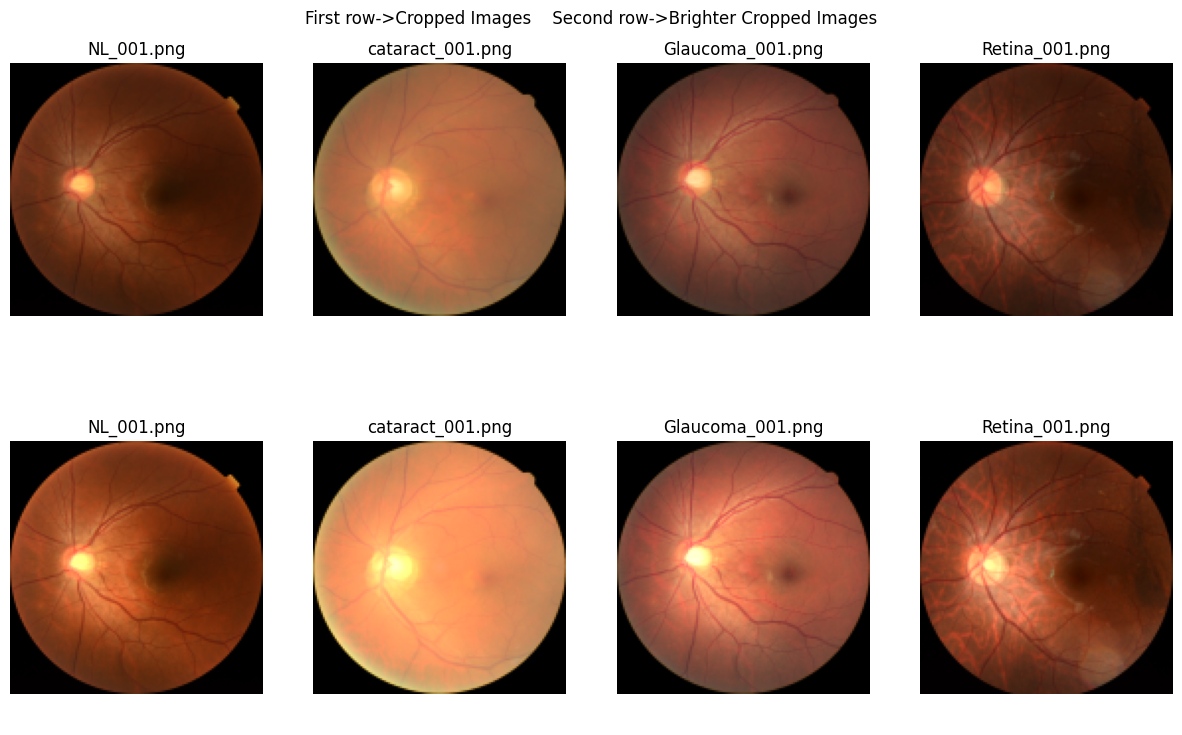

In [20]:
for i in range(4):
    img = deleteBlackAreas(example_paths[i])
    images_array1.append(img)
    img2 = img + 0.4 * img  #brighter image
    img2[img2 > 255] = 255
    images_array2.append(img2 / 255)
display_examples(images_array1, images_array2, "Cropped", "Brighter Cropped")
images_array1.clear()
images_array2.clear()

## Modeling<a class="anchor" id="modeling"></a>

For this project, we used a model which based on CNN(Convolutional Neural network).
Convolutional neural networks (CNNs) are particularly well suited for image classification tasks because they are able to learn hierarchical representations of the data. In image classification, the input is typically an image, which can be thought of as a set of pixel values arranged in a grid. CNNs are able to automatically learn the features present in the images, such as edges, corners, and textures, by applying filters to the input image and creating a transformed output image. These filters are learned during training and are able to extract relevant features from the input data.

One of the key advantages of CNNs is that they are able to learn these features directly from the data, without the need for manual feature engineering. This makes them particularly useful for tasks where it is difficult to manually design features that are able to capture the underlying patterns in the data.

In addition to being able to learn features directly from the data, CNNs are also able to process images of different sizes and aspect ratios, since the filters are applied over the entire input image. This makes them well suited for tasks where the size and shape of the input images may vary.

Overall, CNNs are a powerful tool for image classification tasks and have been successfully applied to a wide range of applications, including object recognition, facial recognition, and medical image analysis.

![](https://i.imgur.com/dAvKYes.png)

In [21]:
def create_model(channel_size=3):
    input_shape = []
    if channel_size == 3:  #RGB or HSV channels
        input_shape = [IMAGE_WIDTH, IMAGE_HEIGHT, channel_size]
    elif channel_size == 1:  #Grayscaled images
        input_shape = [IMAGE_WIDTH, IMAGE_HEIGHT, 1]
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D(),
        Conv2D(64, (3, 3), activation='relu', padding="same"),
        BatchNormalization(),
        MaxPooling2D(),
        Dropout(0.2),
        Conv2D(64, (3, 3), activation='relu', padding="same"),
        BatchNormalization(),
        MaxPooling2D(),
        Conv2D(64, (3, 3), activation='relu', padding="same"),
        BatchNormalization(),
        MaxPooling2D(),
        Dropout(0.2),
        Flatten(),
        Dense(256, activation="relu"),
        Dropout(0.4),
        Dense(4, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                  metrics=['accuracy'])

    return model

In [22]:
#Display the model layers
model_display = create_model()
model_display.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 64)       256       
 hNormalization)                                                 
                                                        

2022-12-31 01:55:22.417991: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_SYSTEM_DRIVER_MISMATCH: system has unsupported display driver / cuda driver combination
2022-12-31 01:55:22.418015: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: semooww
2022-12-31 01:55:22.418020: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: semooww
2022-12-31 01:55:22.418126: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 510.108.3
2022-12-31 01:55:22.418144: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 515.86.1
2022-12-31 01:55:22.418149: E tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:313] kernel version 515.86.1 does not match DSO version 510.108.3 -- cannot find working devices in this configuration
2022-12-31 01:55:2

In [23]:
def strafied_kfold(model, X_train, y_train):
    # Define a StratifiedKFold object
    skf = StratifiedKFold(n_splits=9, shuffle=True, random_state=SEED)
    acc = []
    val_acc = []
    test_acc = []
    loss = []
    val_loss = []
    test_loss = []
    # Iterate over the K folds
    for train_index, test_index in skf.split(X_train, np.argmax(y_train, axis=1)):
        # Split the data into K folds
        X_fold_train, X_fold_val = X_train[train_index], X_train[test_index]
        y_fold_train, y_fold_val = y_train[train_index], y_train[test_index]
        # Train and evaluate the model on the fold
        callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
        reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=3, verbose=1)
        history = model.fit(X_fold_train, y_fold_train,
                            validation_data=(X_fold_val, y_fold_val),
                            epochs=6,
                            batch_size=BATCH_SIZE,
                            steps_per_epoch=len(X_fold_train) / BATCH_SIZE)
        score = model.evaluate(X_test, y_test, verbose=2)
        print('Test loss:', score[0])
        print('Test accuracy:', score[1])
        acc = np.concatenate((acc, history.history['accuracy']), axis=None)
        val_acc = np.concatenate((val_acc, history.history['val_accuracy']), axis=None)
        loss = np.concatenate((loss, history.history['loss']), axis=None)
        val_loss = np.concatenate((val_loss, history.history['val_loss']), axis=None)
        test_acc.append(score[1])
        test_loss.append(score[0])
    return model, acc, val_acc, loss, val_loss, test_acc, test_loss

## Evaluation<a class="anchor" id="evaluation"></a> 
Aside from the tools to build a model Keras library also provides metrics to evaluate and summarize the performance of the model. The ones we utilized are accuracy and loss. Loss is similar to Mean Squared Error (MSE) and can also be called Categorical Cross Entropy. It's a scaler value that should be minimized and it's in inverse proportion to correct predictions. In this process we have also used Stratified kFold Cross Validaton to improve training and testing evaluations. Finally we represent the outcome of the various methods we used through this project via pie-charts for easier interpretation and visualiztion.


In [24]:
# Display the distribution of data on the train and test
def plot_pie_sets(arrays):
    titles = ["Train Set", "Test Set"]
    labels = ["Normal", "Cataract", "Glaucoma", "Retina Disease"]
    fig = plt.figure(figsize=(9, 5))
    plt.title("Distribution")
    plt.axis('off')
    plt.grid(False)
    for i in range(2):
        fig.add_subplot(1, 2, i + 1)
        arr = []
        for j in range(4):
            arr.append((arrays[i] == j).sum())
        plt.title(titles[i])
        plt.pie(arr)
        plt.legend(labels=labels, loc=0)

In [25]:
def plot_history(arrays, title):
    fig = plt.figure(figsize=(15, 6))
    plt.title(f"Evaluation for {title} Images")
    plt.axis('off')
    plt.grid(False)

    fig.add_subplot(1, 2, 1)
    plt.plot(arrays[0])
    plt.plot(arrays[1])

    plt.ylabel("Accuracy")
    plt.xlabel("Epochs")
    plt.legend(["Train", "Validation"], loc=0)

    fig.add_subplot(1, 2, 2)
    plt.plot(arrays[2])
    plt.plot(arrays[3])

    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.legend(["Train", "Validation"], loc=0)

In [26]:
def plot_conf_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.grid(False)
    plt.title(f"Confusion Matrix of {title}")
    plt.show()

In [27]:
# Creating dataset and split the data
train_images, train_labels = create_dataset(train_df)
test_images, test_labels = create_dataset(test_df)
labels = ["Normal", "Cataract", "Glaucoma", "Retina Disease"]


100%|██████████| 121/121 [00:08<00:00, 14.57it/s]


In [28]:
X_train, y_train = train_images, train_labels
X_test, y_test = test_images, test_labels
X_train, X_test = X_train / 255, X_test / 255

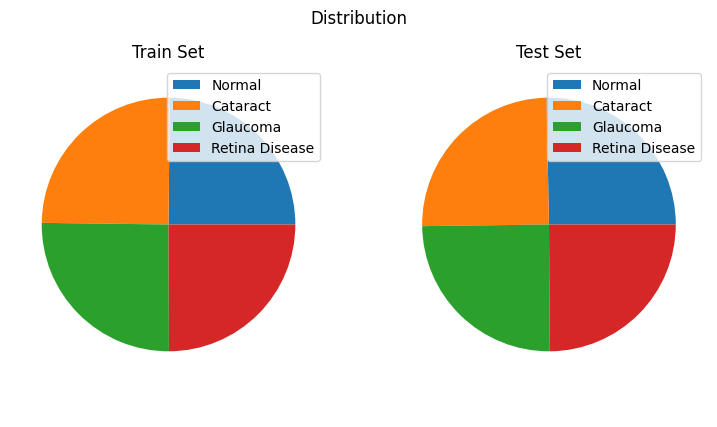

In [29]:
plot_pie_sets([np.argmax(y_train, axis=1), np.argmax(y_test, axis=1)])

In [30]:
model = create_model()
model, acc, val_acc, loss, val_loss, test_acc, test_loss = strafied_kfold(model, X_train, y_train)

Epoch 1/6
80/80 [==============================] - 50s 615ms/step - loss: 1.5857 - accuracy: 0.4203 - val_loss: 4.0840 - val_accuracy: 0.2492
Epoch 2/6
80/80 [==============================] - 48s 598ms/step - loss: 1.1451 - accuracy: 0.4827 - val_loss: 4.2136 - val_accuracy: 0.2492
Epoch 3/6
80/80 [==============================] - 47s 592ms/step - loss: 1.1070 - accuracy: 0.5045 - val_loss: 3.2199 - val_accuracy: 0.3053
Epoch 4/6
80/80 [==============================] - 48s 595ms/step - loss: 1.0347 - accuracy: 0.5536 - val_loss: 2.6100 - val_accuracy: 0.2648
Epoch 5/6
80/80 [==============================] - 47s 591ms/step - loss: 0.9852 - accuracy: 0.5774 - val_loss: 2.2916 - val_accuracy: 0.2866
Epoch 6/6
80/80 [==============================] - 48s 593ms/step - loss: 0.9457 - accuracy: 0.6043 - val_loss: 2.2167 - val_accuracy: 0.3333
23/23 - 3s - loss: 2.4839 - accuracy: 0.3071 - 3s/epoch - 117ms/step
Test loss: 2.4838650226593018
Test accuracy: 0.30705395340919495
Epoch 1/6
80/8

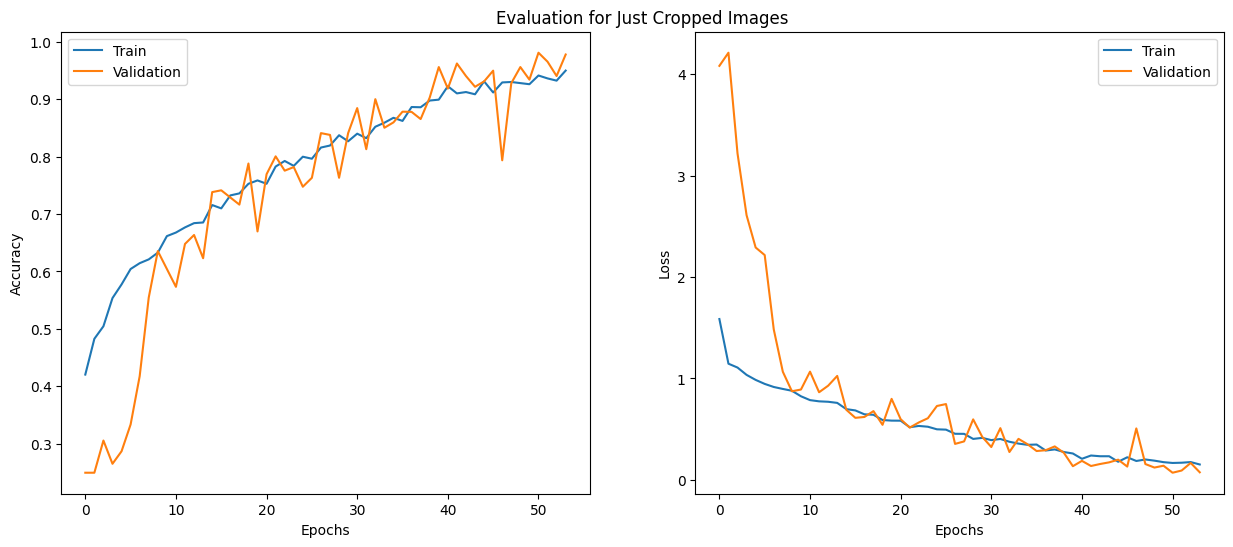

In [31]:
plot_history([acc, val_acc, loss, val_loss], "Just Cropped")

23/23 [==============================] - 3s 120ms/step


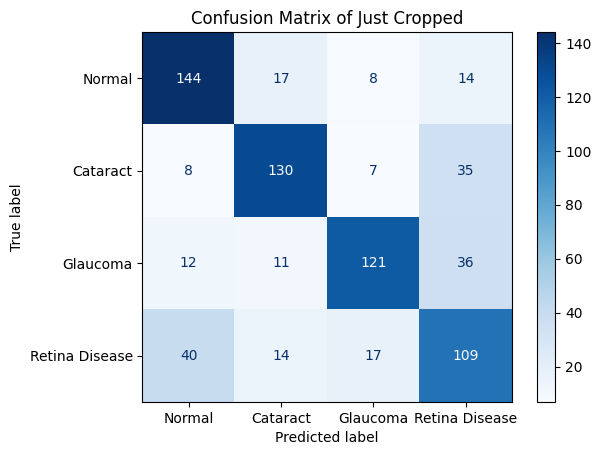

In [32]:
plot_conf_matrix(model, X_test, y_test, "Just Cropped")

In [33]:
# Creating dataset and split the data
X_train = changeMode(train_images, 1)
X_test = changeMode(test_images, 1)
model = create_model()
model, acc, val_acc, loss, val_loss, test_acc_normalized, test_loss_normalized = strafied_kfold(model, X_train, y_train)

Epoch 1/6
80/80 [==============================] - 46s 568ms/step - loss: 1.5332 - accuracy: 0.4561 - val_loss: 3.4404 - val_accuracy: 0.2492
Epoch 2/6
80/80 [==============================] - 45s 566ms/step - loss: 1.0924 - accuracy: 0.5212 - val_loss: 4.9835 - val_accuracy: 0.2492
Epoch 3/6
80/80 [==============================] - 46s 568ms/step - loss: 1.0581 - accuracy: 0.5271 - val_loss: 4.6991 - val_accuracy: 0.2492
Epoch 4/6
80/80 [==============================] - 45s 565ms/step - loss: 0.9862 - accuracy: 0.5595 - val_loss: 4.6282 - val_accuracy: 0.2523
Epoch 5/6
80/80 [==============================] - 45s 566ms/step - loss: 0.9882 - accuracy: 0.5676 - val_loss: 2.6502 - val_accuracy: 0.3084
Epoch 6/6
80/80 [==============================] - 45s 565ms/step - loss: 0.9409 - accuracy: 0.6004 - val_loss: 1.4583 - val_accuracy: 0.4548
23/23 - 3s - loss: 1.6317 - accuracy: 0.4094 - 3s/epoch - 110ms/step
Test loss: 1.631682276725769
Test accuracy: 0.40940526127815247
Epoch 1/6
80/80

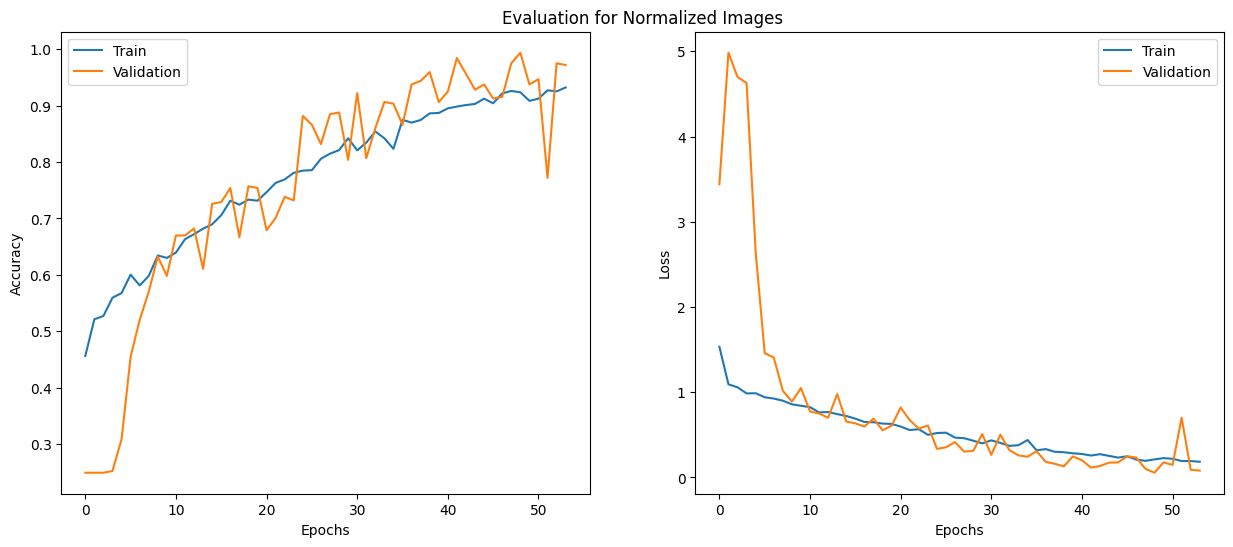

In [34]:
plot_history([acc, val_acc, loss, val_loss], "Normalized")

23/23 [==============================] - 3s 122ms/step


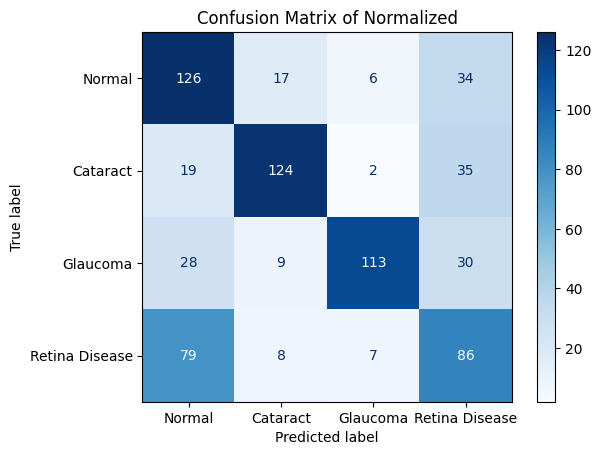

In [35]:
plot_conf_matrix(model, X_test, y_test, "Normalized")

In [36]:
# Creating dataset and split the data
X_train = changeMode(train_images, 2)
X_test = changeMode(test_images, 2)
model = create_model(1)
model, acc, val_acc, loss, val_loss, test_acc_canny_edge, test_loss_canny_edge = strafied_kfold(model, X_train, y_train)

Epoch 1/6
80/80 [==============================] - 45s 553ms/step - loss: 1.6901 - accuracy: 0.3809 - val_loss: 7.0036 - val_accuracy: 0.2492
Epoch 2/6
80/80 [==============================] - 44s 551ms/step - loss: 1.2208 - accuracy: 0.4218 - val_loss: 10.5485 - val_accuracy: 0.2492
Epoch 3/6
80/80 [==============================] - 44s 551ms/step - loss: 1.2018 - accuracy: 0.4472 - val_loss: 12.2319 - val_accuracy: 0.2492
Epoch 4/6
80/80 [==============================] - 44s 551ms/step - loss: 1.2089 - accuracy: 0.4343 - val_loss: 10.5241 - val_accuracy: 0.2492
Epoch 5/6
80/80 [==============================] - 44s 554ms/step - loss: 1.1761 - accuracy: 0.4713 - val_loss: 7.4051 - val_accuracy: 0.2492
Epoch 6/6
80/80 [==============================] - 44s 554ms/step - loss: 1.1658 - accuracy: 0.4655 - val_loss: 3.2547 - val_accuracy: 0.2679
23/23 - 2s - loss: 3.4766 - accuracy: 0.2586 - 2s/epoch - 108ms/step
Test loss: 3.4765875339508057
Test accuracy: 0.25864455103874207
Epoch 1/6
8

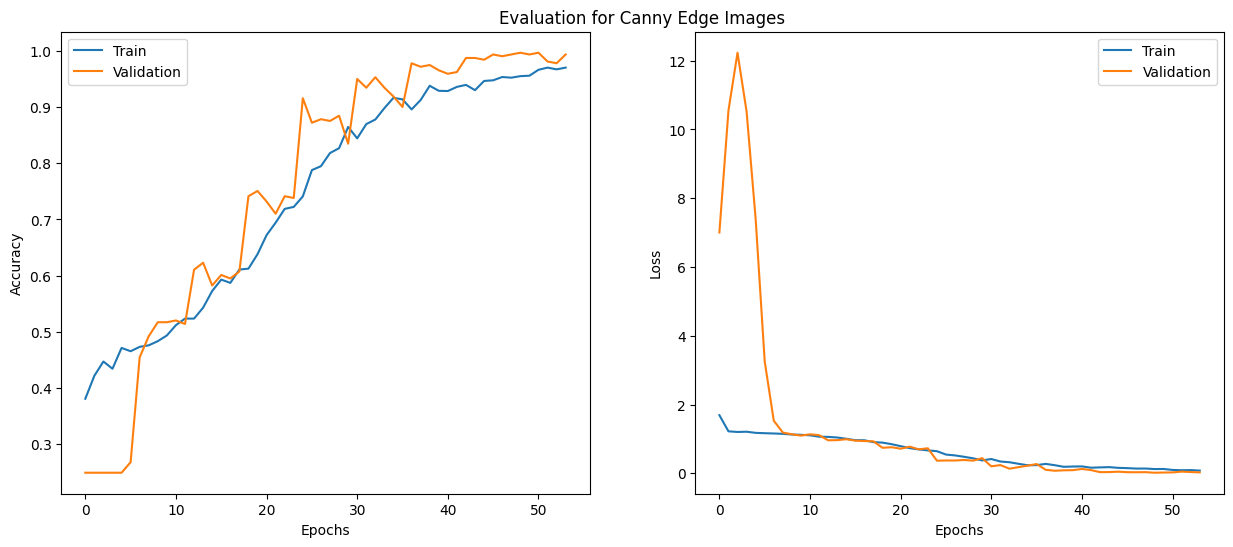

In [37]:
plot_history([acc, val_acc, loss, val_loss], "Canny Edge")

23/23 [==============================] - 3s 121ms/step


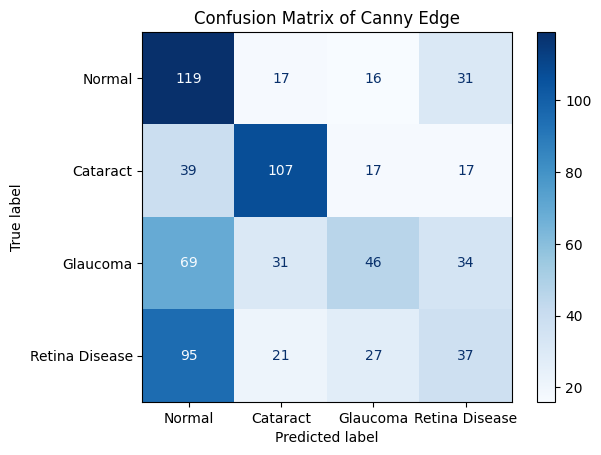

In [38]:
plot_conf_matrix(model, X_test, y_test, "Canny Edge")

In [39]:
# Creating dataset and split the data
X_train = changeMode(train_images, 3)
X_test = changeMode(test_images, 3)
model = create_model(1)
model, acc, val_acc, loss, val_loss, test_acc_gray, test_loss_gray = strafied_kfold(model, X_train, y_train)

Epoch 1/6
80/80 [==============================] - 45s 553ms/step - loss: 1.6998 - accuracy: 0.3255 - val_loss: 2.9381 - val_accuracy: 0.2492
Epoch 2/6
80/80 [==============================] - 44s 553ms/step - loss: 1.3024 - accuracy: 0.3782 - val_loss: 3.9286 - val_accuracy: 0.2492
Epoch 3/6
80/80 [==============================] - 44s 552ms/step - loss: 1.2625 - accuracy: 0.3922 - val_loss: 3.5928 - val_accuracy: 0.2430
Epoch 4/6
80/80 [==============================] - 44s 553ms/step - loss: 1.2134 - accuracy: 0.4304 - val_loss: 3.8441 - val_accuracy: 0.2492
Epoch 5/6
80/80 [==============================] - 44s 553ms/step - loss: 1.1563 - accuracy: 0.4639 - val_loss: 4.0385 - val_accuracy: 0.2492
Epoch 6/6
80/80 [==============================] - 44s 555ms/step - loss: 1.1116 - accuracy: 0.5037 - val_loss: 4.5575 - val_accuracy: 0.2492
23/23 - 2s - loss: 4.5525 - accuracy: 0.2490 - 2s/epoch - 107ms/step
Test loss: 4.552497863769531
Test accuracy: 0.2489626556634903
Epoch 1/6
80/80 

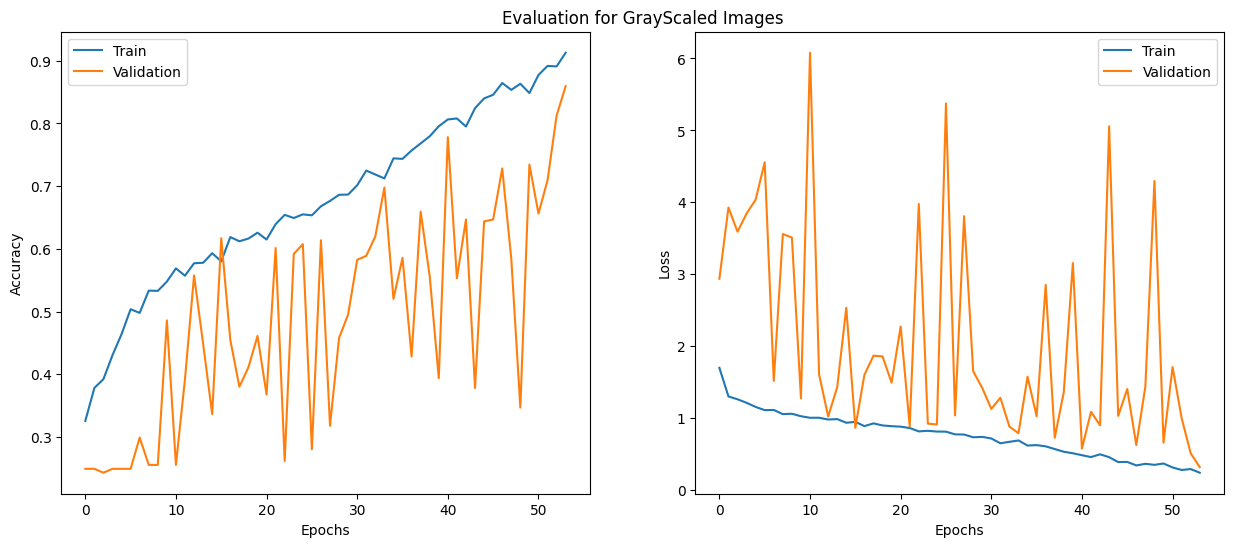

In [40]:
plot_history([acc, val_acc, loss, val_loss], "GrayScaled")

23/23 [==============================] - 3s 121ms/step


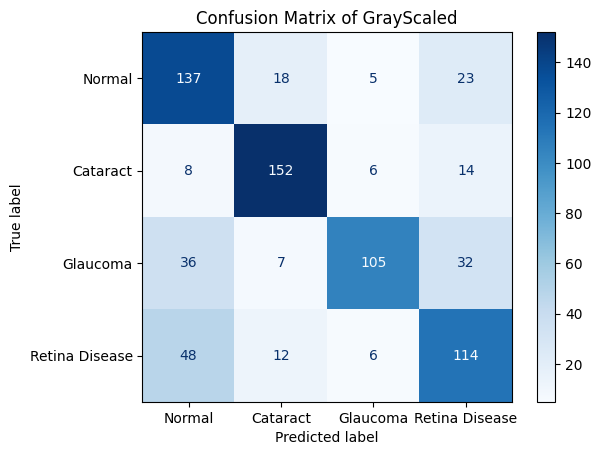

In [41]:
plot_conf_matrix(model, X_test, y_test, "GrayScaled")

In [42]:
# Creating dataset and split the data
X_train = changeMode(train_images, 4)
X_test = changeMode(test_images, 4)
model = create_model(1)
model, acc, val_acc, loss, val_loss, test_acc_ahe, test_loss_ahe = strafied_kfold(model, X_train, y_train)

Epoch 1/6
80/80 [==============================] - 45s 551ms/step - loss: 1.7872 - accuracy: 0.3404 - val_loss: 6.3933 - val_accuracy: 0.2492
Epoch 2/6
80/80 [==============================] - 45s 555ms/step - loss: 1.2263 - accuracy: 0.4168 - val_loss: 11.3677 - val_accuracy: 0.2492
Epoch 3/6
80/80 [==============================] - 45s 557ms/step - loss: 1.1784 - accuracy: 0.4355 - val_loss: 13.1357 - val_accuracy: 0.2492
Epoch 4/6
80/80 [==============================] - 45s 558ms/step - loss: 1.1582 - accuracy: 0.4480 - val_loss: 11.4126 - val_accuracy: 0.2492
Epoch 5/6
80/80 [==============================] - 45s 558ms/step - loss: 1.1156 - accuracy: 0.4877 - val_loss: 12.5885 - val_accuracy: 0.2492
Epoch 6/6
80/80 [==============================] - 45s 558ms/step - loss: 1.0632 - accuracy: 0.5337 - val_loss: 9.2466 - val_accuracy: 0.2492
23/23 - 2s - loss: 9.2700 - accuracy: 0.2490 - 2s/epoch - 108ms/step
Test loss: 9.27004623413086
Test accuracy: 0.2489626556634903
Epoch 1/6
80/

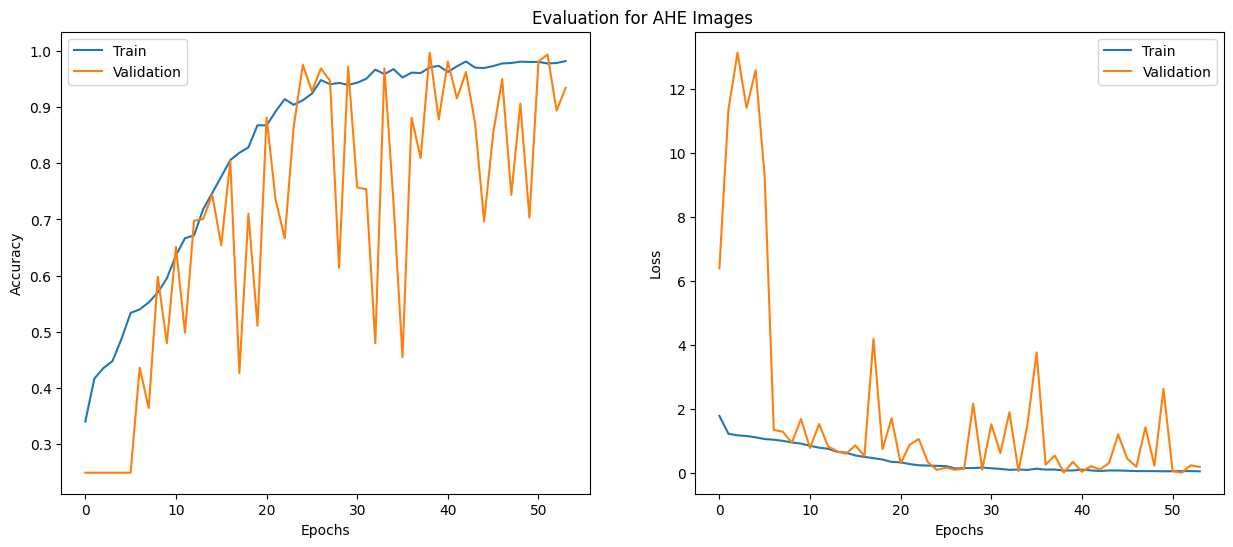

In [43]:
plot_history([acc, val_acc, loss, val_loss], "AHE")

23/23 [==============================] - 3s 122ms/step


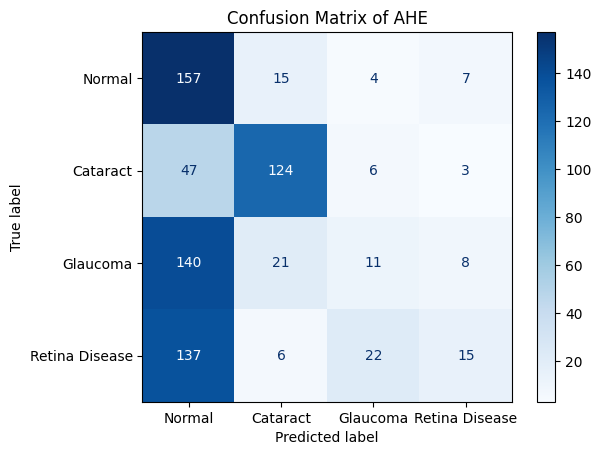

In [44]:
plot_conf_matrix(model, X_test, y_test, "AHE")

In [45]:
# Creating dataset and split the data
X_train = changeMode(train_images, 5)
X_test = changeMode(test_images, 5)
model = create_model()
model, acc, val_acc, loss, val_loss, test_acc_xyz, test_loss_xyz = strafied_kfold(model, X_train, y_train)

Epoch 1/6
80/80 [==============================] - 46s 567ms/step - loss: 1.7533 - accuracy: 0.3255 - val_loss: 4.2174 - val_accuracy: 0.2492
Epoch 2/6
80/80 [==============================] - 45s 567ms/step - loss: 1.2515 - accuracy: 0.4039 - val_loss: 4.4116 - val_accuracy: 0.2492
Epoch 3/6
80/80 [==============================] - 45s 565ms/step - loss: 1.1663 - accuracy: 0.4655 - val_loss: 5.7681 - val_accuracy: 0.2492
Epoch 4/6
80/80 [==============================] - 45s 565ms/step - loss: 1.0960 - accuracy: 0.5146 - val_loss: 6.5364 - val_accuracy: 0.2492
Epoch 5/6
80/80 [==============================] - 45s 567ms/step - loss: 1.0267 - accuracy: 0.5446 - val_loss: 7.1654 - val_accuracy: 0.2492
Epoch 6/6
80/80 [==============================] - 45s 567ms/step - loss: 0.9917 - accuracy: 0.5762 - val_loss: 5.1809 - val_accuracy: 0.2492
23/23 - 3s - loss: 5.2240 - accuracy: 0.2490 - 3s/epoch - 111ms/step
Test loss: 5.223973274230957
Test accuracy: 0.2489626556634903
Epoch 1/6
80/80 

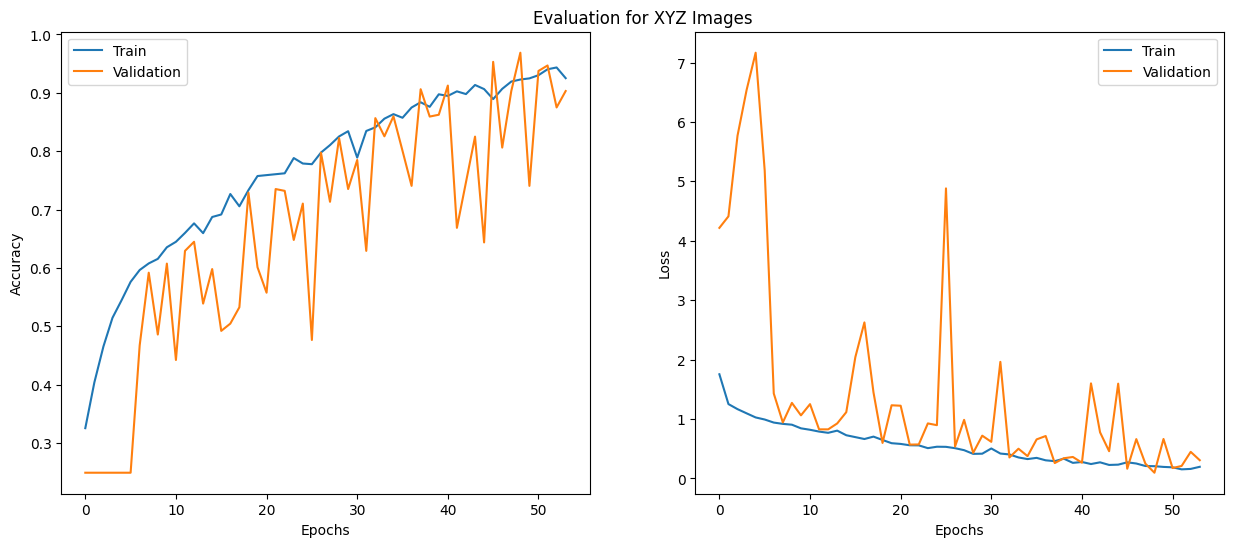

In [46]:
plot_history([acc, val_acc, loss, val_loss], "XYZ")

23/23 [==============================] - 3s 124ms/step


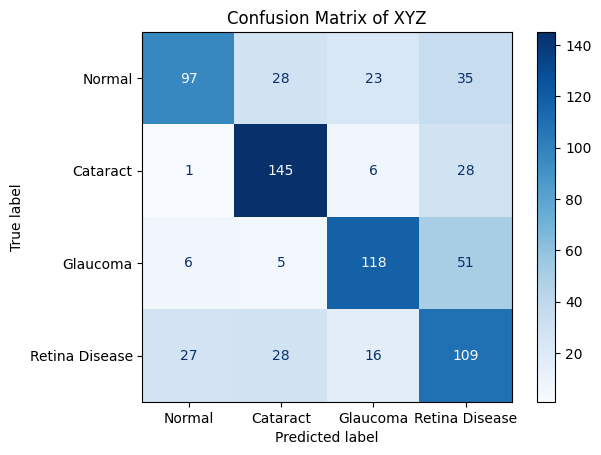

In [47]:
plot_conf_matrix(model, X_test, y_test, "XYZ")

In [48]:
# Creating dataset and split the data
X_train = changeMode(train_images, 6)
X_test = changeMode(test_images, 6)
model = create_model(1)
model, acc, val_acc, loss, val_loss, test_acc_bin, test_loss_bin = strafied_kfold(model, X_train, y_train)

Epoch 1/6
80/80 [==============================] - 46s 555ms/step - loss: 1.5141 - accuracy: 0.4097 - val_loss: 6.5742 - val_accuracy: 0.2492
Epoch 2/6
80/80 [==============================] - 44s 554ms/step - loss: 1.1560 - accuracy: 0.4530 - val_loss: 10.0058 - val_accuracy: 0.2492
Epoch 3/6
80/80 [==============================] - 45s 555ms/step - loss: 1.1129 - accuracy: 0.4873 - val_loss: 10.6141 - val_accuracy: 0.2492
Epoch 4/6
80/80 [==============================] - 45s 555ms/step - loss: 1.0668 - accuracy: 0.5115 - val_loss: 9.3867 - val_accuracy: 0.2492
Epoch 5/6
80/80 [==============================] - 44s 554ms/step - loss: 1.0527 - accuracy: 0.5166 - val_loss: 6.9179 - val_accuracy: 0.2960
Epoch 6/6
80/80 [==============================] - 44s 554ms/step - loss: 1.0428 - accuracy: 0.5224 - val_loss: 5.2230 - val_accuracy: 0.3084
23/23 - 3s - loss: 5.5740 - accuracy: 0.2780 - 3s/epoch - 110ms/step
Test loss: 5.57396125793457
Test accuracy: 0.2780083119869232
Epoch 1/6
80/80

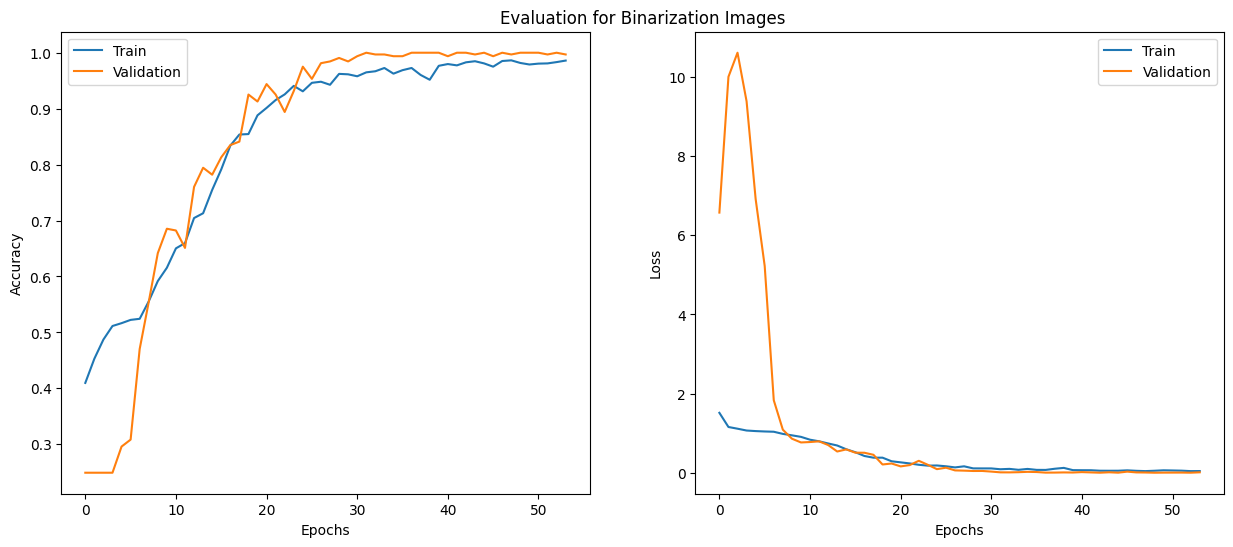

In [49]:
plot_history([acc, val_acc, loss, val_loss], "Binarization")

23/23 [==============================] - 3s 116ms/step


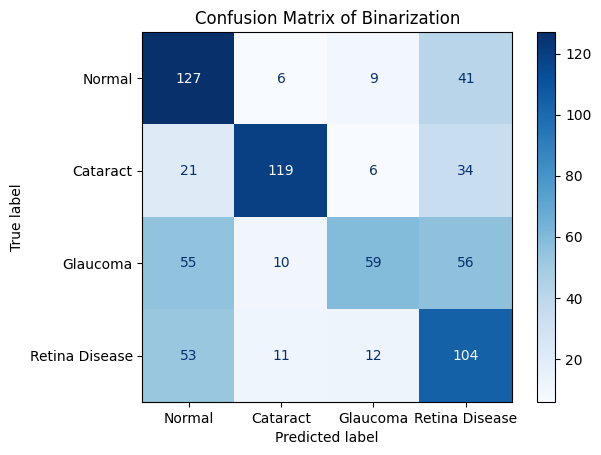

In [50]:
plot_conf_matrix(model, X_test, y_test, "Binarization")

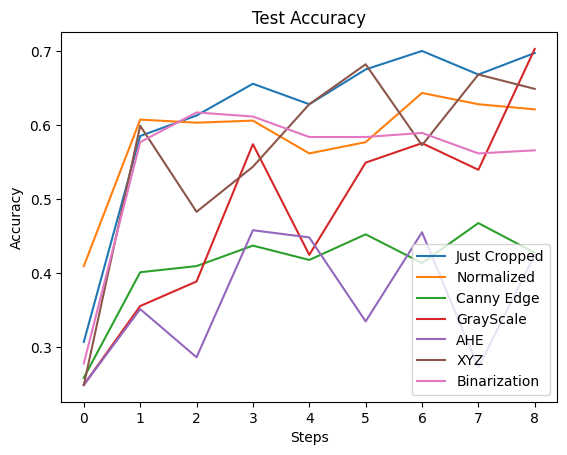

In [51]:
plt.plot(test_acc)
plt.plot(test_acc_normalized)
plt.plot(test_acc_canny_edge)
plt.plot(test_acc_gray)
plt.plot(test_acc_ahe)
plt.plot(test_acc_xyz)
plt.plot(test_acc_bin)
plt.title("Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Steps")
plt.legend(["Just Cropped", "Normalized", "Canny Edge", "GrayScale", "AHE", "XYZ", "Binarization"], loc=0)

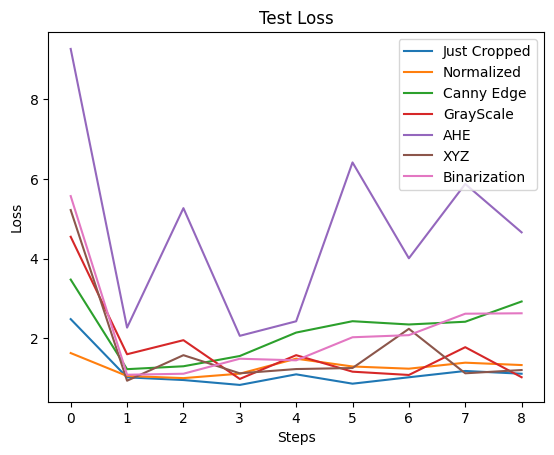

In [52]:
plt.plot(test_loss)
plt.plot(test_loss_normalized)
plt.plot(test_loss_canny_edge)
plt.plot(test_loss_gray)
plt.plot(test_loss_ahe)
plt.plot(test_loss_xyz)
plt.plot(test_loss_bin)
plt.title("Test Loss")
plt.ylabel("Loss")
plt.xlabel("Steps")
plt.legend(["Just Cropped", "Normalized", "Canny Edge", "GrayScale", "AHE", "XYZ", "Binarization"], loc=0)

# REFERENCES
[1] https://en.wikipedia.org/wiki/Histogram_equalization 

[2] https://www.scratchapixel.com/lessons/digital-imaging/colors/color-space 

[3] https://craftofcoding.wordpress.com/2017/02/13/image-binarization-1-introduction/ 



**Disclaimer!** <font color='grey'>This notebook was prepared by <student name(s)> as a term project for the *BBM467 - Data Intensive Applications* class. The notebook is available for educational purposes only. There is no guarantee on the correctness of the content provided as it is a student work.

If you think there is any copyright violation, please let us [know](https://forms.gle/BNNRB2kR8ZHVEREq8). 
</font>